In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# NUTS-3 level shapefile
map_df = gpd.read_file('../data/shapefile/NUTS_RG_10M_2016_3035.shp')

# FILTER for NUTS-2
map_df = map_df[map_df['LEVL_CODE']<3]

# keep 4-digit region codes
map_df['digits'] = map_df['NUTS_ID'].apply(lambda x: len(x))
map_df = map_df[map_df['digits'] == 4]

In [5]:
# read back the adjacency list
adj_df = pd.read_csv("../data/adj_list_NUTS2.csv", sep=";")

<ipython-input-6-bf26d1f54ad4>:15: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "density" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('../figures/example_map.png', density=300, bbox_inches="tight")


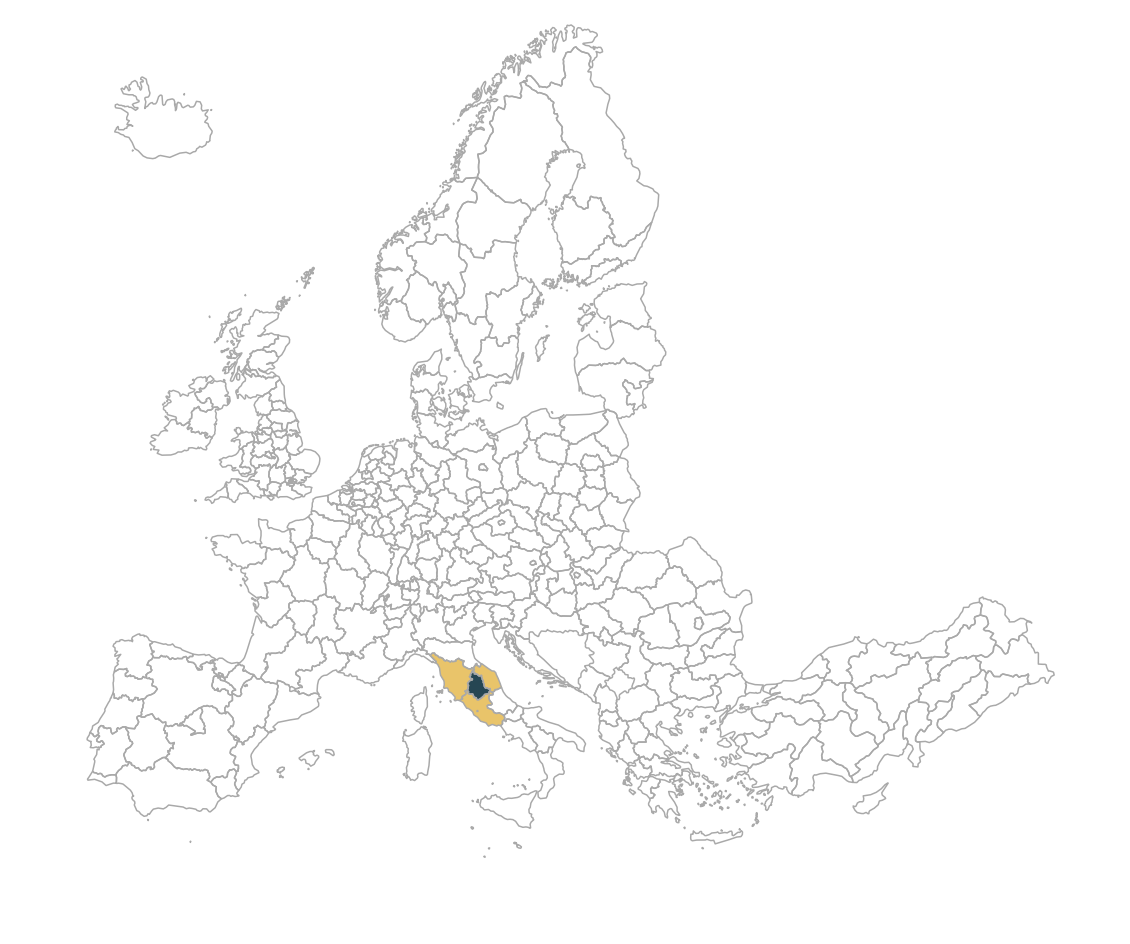

In [6]:
# plot a region in Italy as an example -- ITI2 NUTS code
fig = plt.figure(figsize=(20,20))
ax = plt.gca()

map_df.boundary.plot(ax=ax, color="darkgrey")
map_df[map_df["NUTS_ID"]=="ITI2"]["geometry"].plot(ax=ax,color="#264653")

neighbors = adj_df[adj_df["NUTS_ID"]=="ITI2"]["neighbors"].to_list()
map_df[map_df["NUTS_ID"].isin(neighbors)]["geometry"].plot(ax=ax, color="#e9c46a")

plt.xlim(0.225e7, 0.765e7)
plt.ylim(1e6, 5.5e6)
ax.axis("off")
plt.show()
# plt.savefig('../figures/example_map.png', density=300, bbox_inches="tight")